In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('../data/processed/full_dataset.csv')

In [3]:
data.set_index('date', inplace=True)
data

,Average,Day,Week,Month,Year,Quarter,Holiday,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,,,,,,,
2013-06-16,20.5,16,24,6,2013,2,0,22.0,18.8,20.4,41.7,7.6,5.65,1.27
2013-06-17,20.5,17,25,6,2013,2,1,24.0,19.2,21.4,9.6,6.4,16.08,3.14
2013-06-18,19.5,18,25,6,2013,2,0,24.9,19.4,21.7,11.0,7.4,14.58,2.99
2013-06-19,20.5,19,25,6,2013,2,0,22.0,19.2,20.3,100.1,5.4,3.96,0.97
2013-06-20,20.5,20,25,6,2013,2,0,25.1,17.7,21.0,3.4,6.6,19.90,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-09,36.5,9,18,5,2021,2,0,22.2,14.5,18.1,3.2,9.2,21.30,3.89
2021-05-10,36.5,10,19,5,2021,2,0,22.2,14.6,18.2,5.0,5.4,18.96,3.52
2021-05-11,36.5,11,19,5,2021,2,0,22.4,14.5,17.9,3.9,6.9,16.93,3.14


In [4]:
time_series = ['Average', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',	'precipitation_sum',	'wind_speed_10m_max',	'shortwave_radiation_sum', 'et0_fao_evapotranspiration']

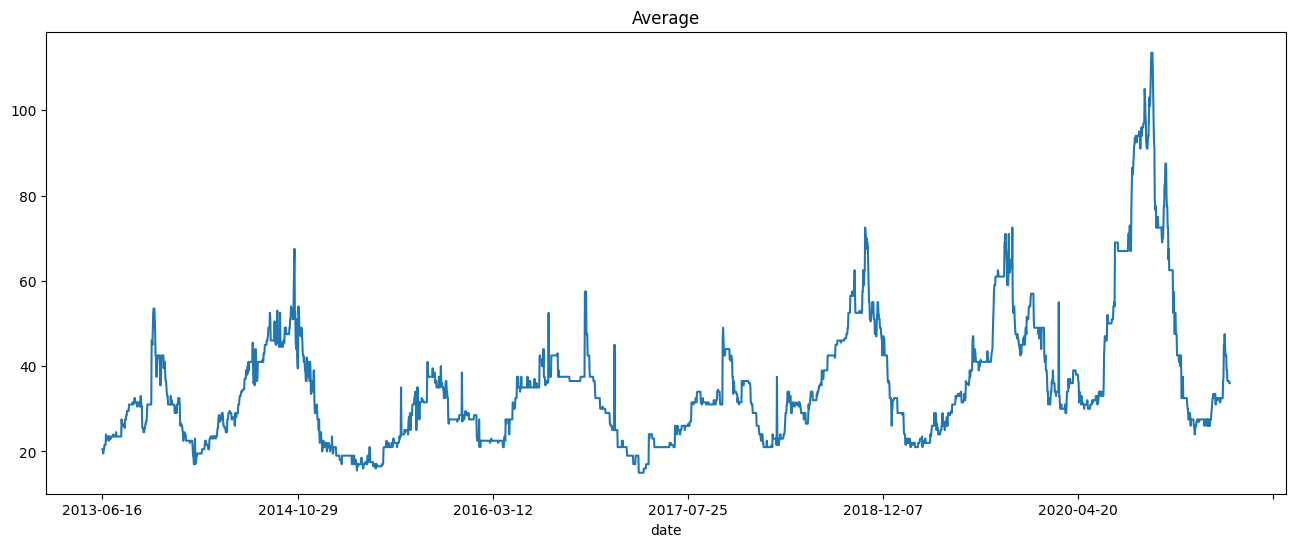

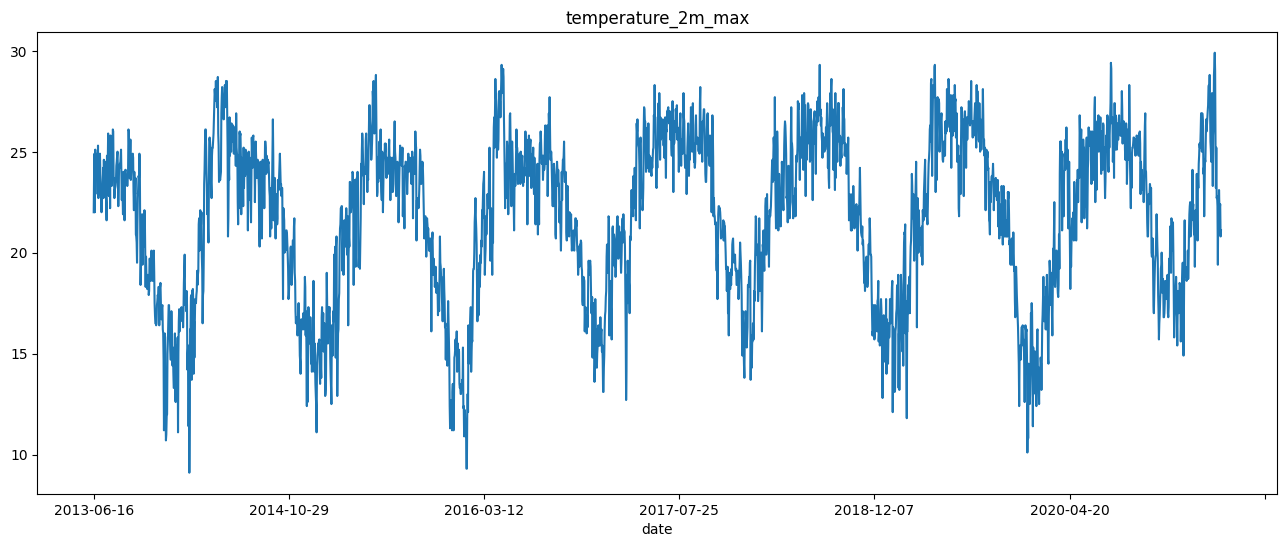

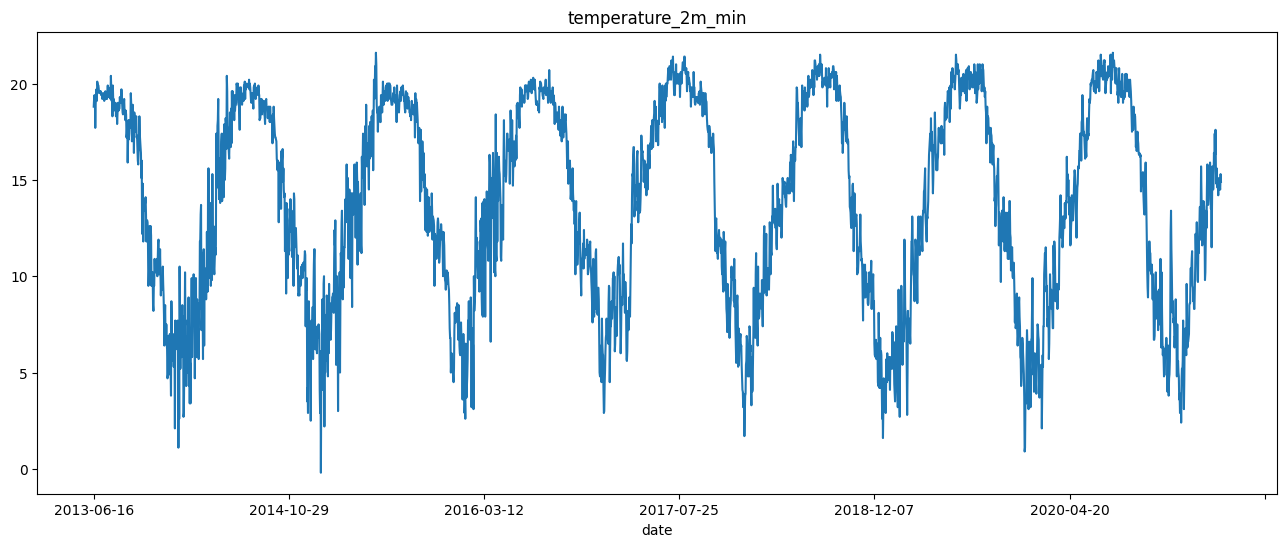

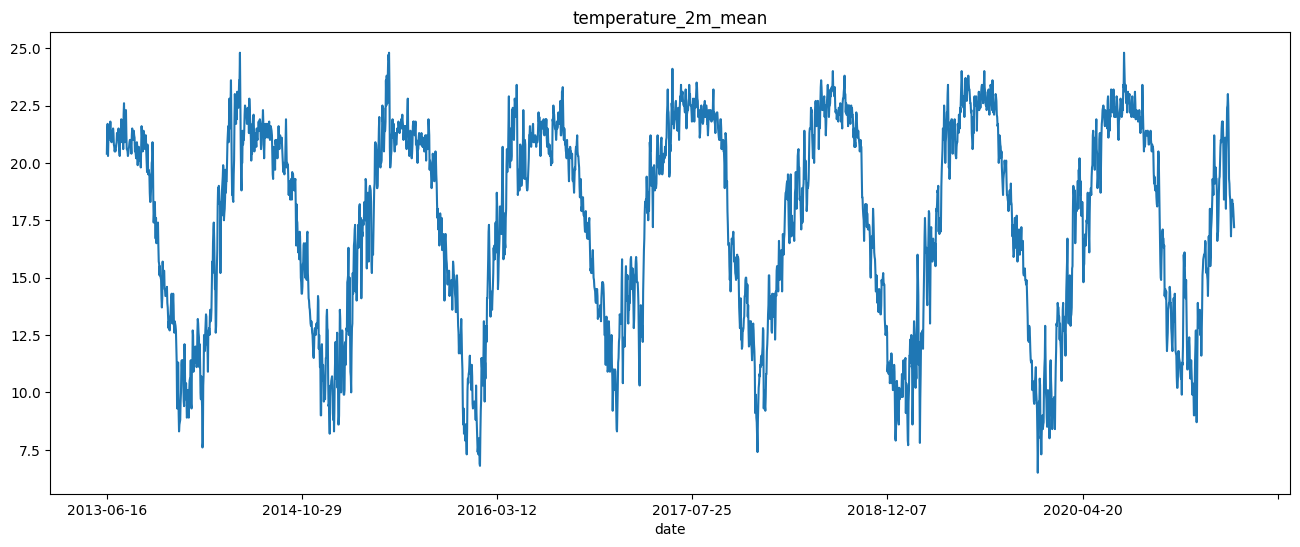

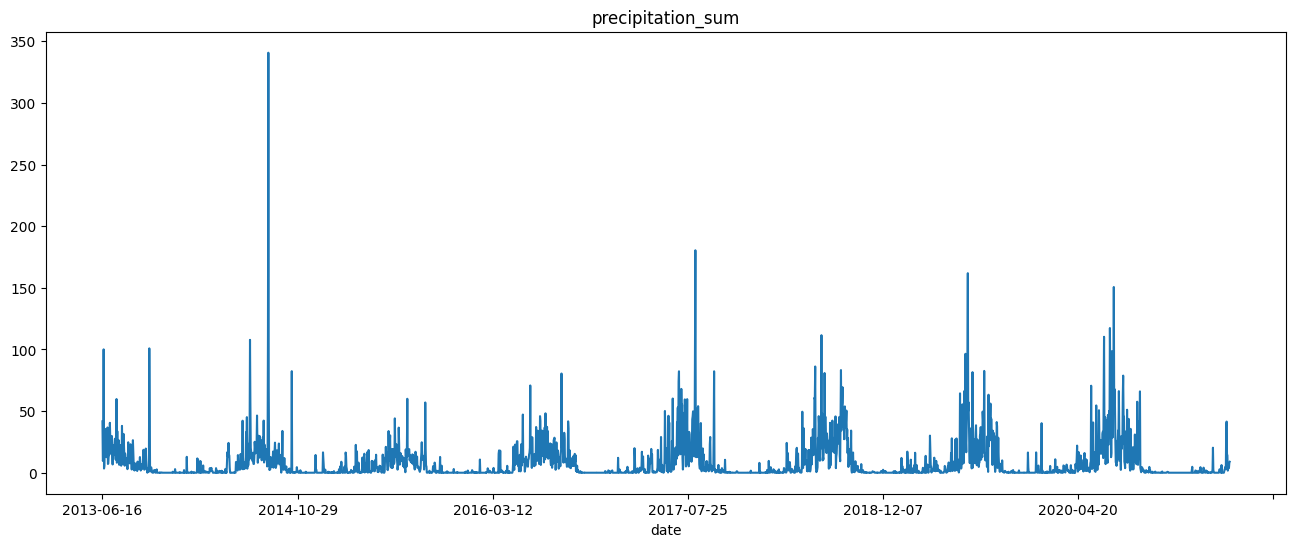

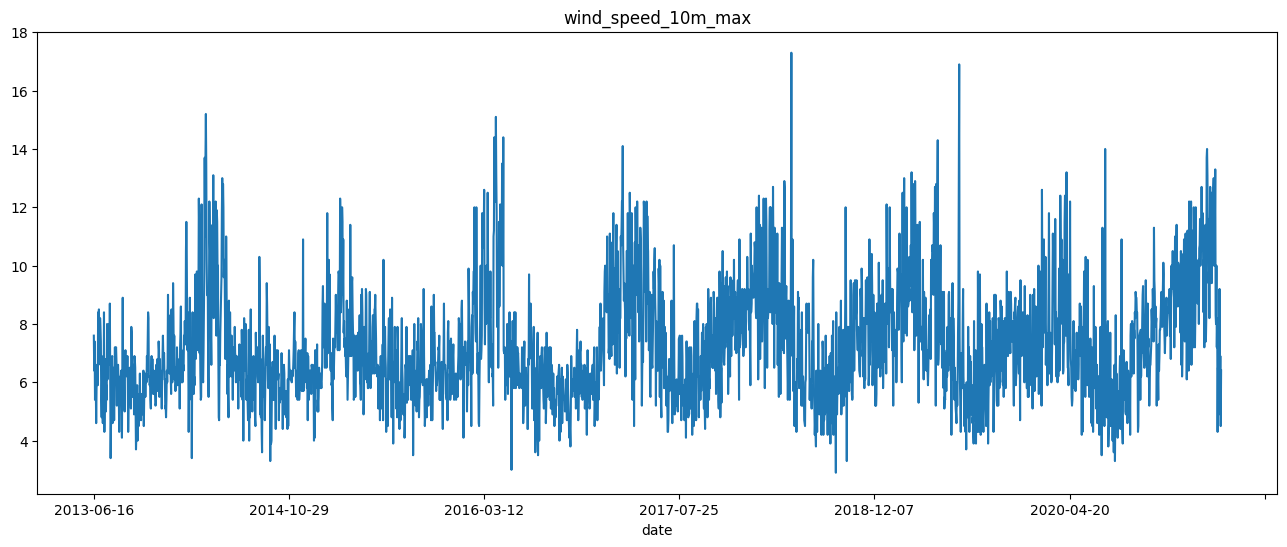

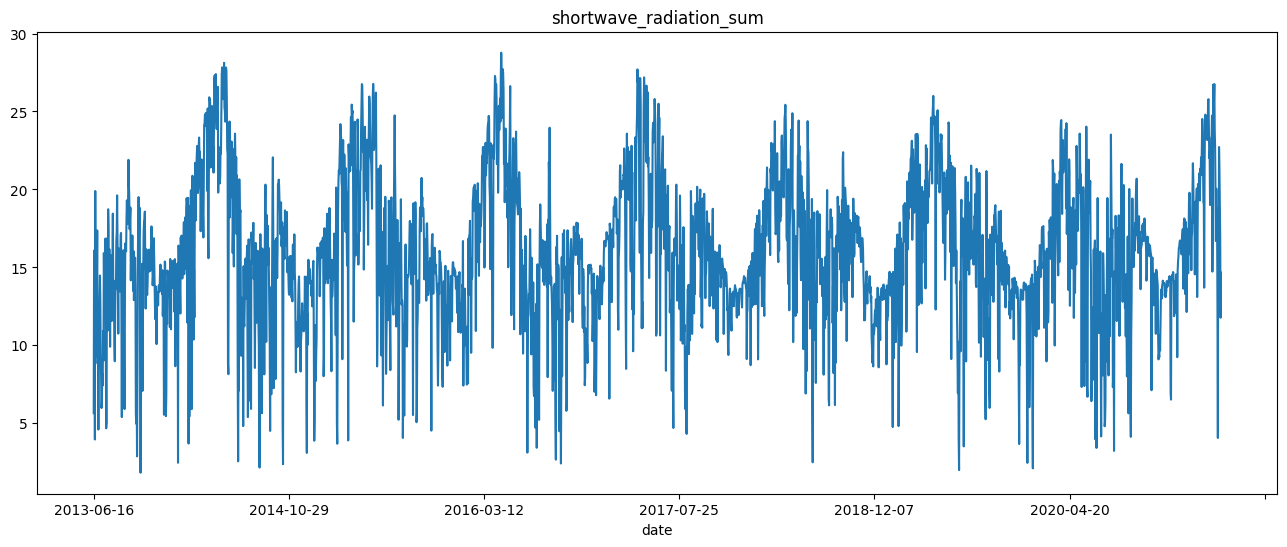

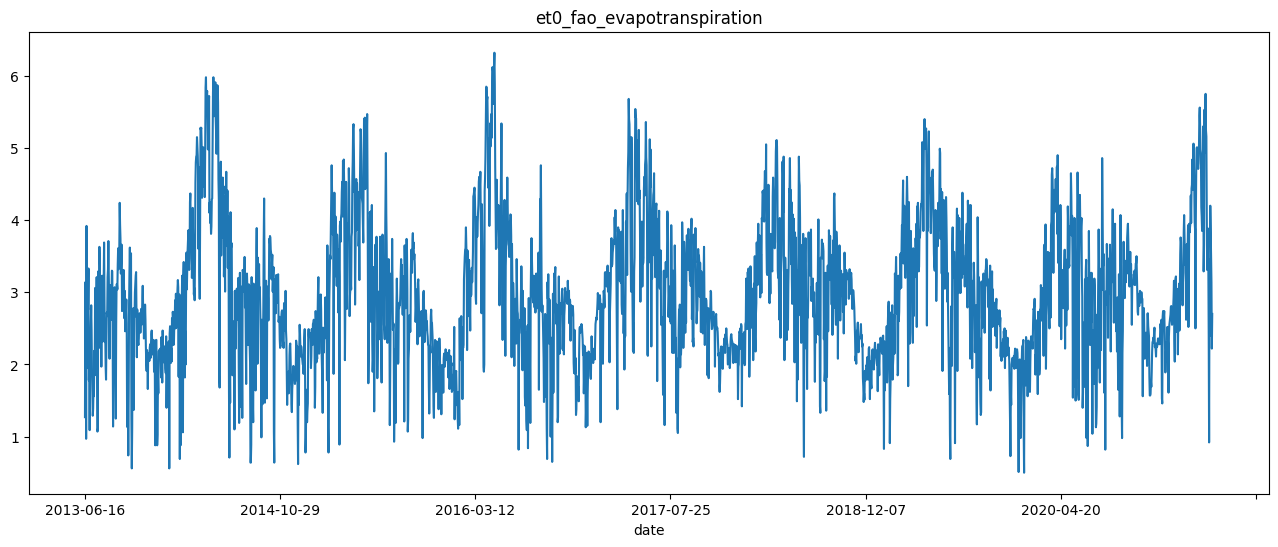

In [5]:
# plot all time series with bigger plots
for ts in time_series:
    data[ts].plot(figsize=(16, 6))
    plt.title(ts)
    plt.show()



In [6]:
# for ts in time_series decompose and save trend, seasonal and residual to variable
trends = {}
seasonals = {}
residuals = {}

# Loop through each column in the DataFrame
for ts in time_series:
    print(f"Decomposing: {ts}")
    
    # Decompose the time series
    result = seasonal_decompose(data[ts], model='additive', period=365)
    
    # Store the results in dictionaries
    trends[ts] = result.trend
    seasonals[ts] = result.seasonal
    residuals[ts] = result.resid

    # Plot the decomposition for each column
    # plt.rcParams['figure.figsize'] = [10, 8] 
    # result.plot()
    # plt.show()

Decomposing: Average
Decomposing: temperature_2m_max
Decomposing: temperature_2m_min
Decomposing: temperature_2m_mean
Decomposing: precipitation_sum
Decomposing: wind_speed_10m_max
Decomposing: shortwave_radiation_sum
Decomposing: et0_fao_evapotranspiration


In [7]:
trend_df = pd.DataFrame(trends)
seasonal_df = pd.DataFrame(seasonals)
residual_df = pd.DataFrame(residuals)

In [8]:
# Check for NaN values in the decomposed components
print("Missing values in trends:\n", trend_df.isnull().sum())
print("Missing values in seasonals:\n", seasonal_df.isnull().sum())
print("Missing values in residuals:\n", residual_df.isnull().sum())

Missing values in trends:
 Average                       364
temperature_2m_max            364
temperature_2m_min            364
temperature_2m_mean           364
precipitation_sum             364
wind_speed_10m_max            364
shortwave_radiation_sum       364
et0_fao_evapotranspiration    364
dtype: int64
Missing values in seasonals:
 Average                       0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
precipitation_sum             0
wind_speed_10m_max            0
shortwave_radiation_sum       0
et0_fao_evapotranspiration    0
dtype: int64
Missing values in residuals:
 Average                       364
temperature_2m_max            364
temperature_2m_min            364
temperature_2m_mean           364
precipitation_sum             364
wind_speed_10m_max            364
shortwave_radiation_sum       364
et0_fao_evapotranspiration    364
dtype: int64


In [9]:
# Fill missing values if necessary
trend_df = trend_df.bfill().ffill()
seasonal_df = seasonal_df.bfill().ffill()
residual_df = residual_df.bfill().ffill()

In [10]:
# Initialize dictionary for synthetic datasets
synthetic_variations = {}

# Generate variations
for ts in time_series:
    variations = []
    
    synthetic = trend_df[ts] + seasonal_df[ts] + residual_df[ts]
    variations.append(("Original Synthetic", synthetic))

    # 1. Amplify trend
    # Slightly increase the trend component
    amplified_trend = trend_df[ts] * 1.1
    synthetic_v1 = amplified_trend + seasonal_df[ts] + residual_df[ts]
    variations.append(("Amplified Trend", synthetic_v1))

    # 2. Add more noise
    # Increase the noise component to simulate randomness
    added_noise = np.random.normal(0, 2, len(residual_df[ts]))
    synthetic_v2 = trend_df[ts] + seasonal_df[ts] + residual_df[ts] + added_noise
    variations.append(("Increased Noise", synthetic_v2))

    # 3. Reduce seasonality
    # Reduce the seasonal component to simulate weakening periodic effects
    reduced_seasonality = seasonal_df[ts] * 0.7
    synthetic_v3 = trend_df[ts] + reduced_seasonality + residual_df[ts]
    variations.append(("Reduced Seasonality", synthetic_v3))

    # 4. Nonlinear trend
    # Introduce a quadratic trend to simulate nonlinearity
    nonlinear_trend = trend_df[ts] + 0.000005 * (np.arange(len(trend_df[ts])) ** 2)
    synthetic_v4 = nonlinear_trend + seasonal_df[ts] + residual_df[ts]
    variations.append(("Nonlinear Trend", synthetic_v4))

    # 5. Add anomalies
    # Introduce sudden spikes in the data
    anomalies = np.zeros_like(residual_df[ts])
    anomalies[np.random.choice(len(anomalies), size=10, replace=False)] = np.random.uniform(5, 15, 10)
    synthetic_v5 = trend_df[ts] + seasonal_df[ts] + residual_df[ts] + anomalies
    variations.append(("Added Anomalies", synthetic_v5))

    # 6. Structural break
    # Add an abrupt change in trend in the middle of the data
    structural_break = trend_df[ts].copy()
    break_point = len(structural_break) // 2
    structural_break[break_point:] += np.linspace(0, 5, len(structural_break) - break_point)
    synthetic_v6 = structural_break + seasonal_df[ts] + residual_df[ts]
    variations.append(("Structural Break", synthetic_v6))

    # 7. Seasonal frequency changes
    # Simulate shorter seasonal cycles
    shortened_seasonal = np.tile(seasonal_df[ts][:30], len(seasonal_df[ts]) // 30 + 1)[:len(seasonal_df[ts])]
    synthetic_v7 = trend_df[ts] + shortened_seasonal + residual_df[ts]
    variations.append(("Shortened Seasonality", synthetic_v7))

    # 8. Non-stationary variance
    # Gradually increase the residual variance over time
    time_index = np.arange(len(residual_df[ts]))
    increasing_variance = residual_df[ts] * (1 + 0.0005 * time_index)
    synthetic_v8 = trend_df[ts] + seasonal_df[ts] + increasing_variance
    variations.append(("Non-Stationary Variance", synthetic_v8))

    # 9. Regime switching
    # Simulate two regimes with different trends
    regime_trend = np.piecewise(
        time_index,
        [time_index < len(time_index) // 2, time_index >= len(time_index) // 2],
        [lambda x: trend_df[ts][:len(trend_df[ts]) // 2] * 1.5,
         lambda x: trend_df[ts][len(trend_df[ts]) // 2:] * 0.5]
    )
    synthetic_v9 = regime_trend + seasonal_df[ts] + residual_df[ts]
    variations.append(("Regime Switching", synthetic_v9))


    synthetic_variations[ts] = variations

In [11]:
# Combine variations into new DataFrames
synthetic_datasets = {
    variation_name: pd.DataFrame({ts: synthetic_variations[ts][idx][1] for ts in time_series})
    for idx, (variation_name, _) in enumerate(synthetic_variations[data.columns[0]])
}
        

Visualizing dataset: Original Synthetic


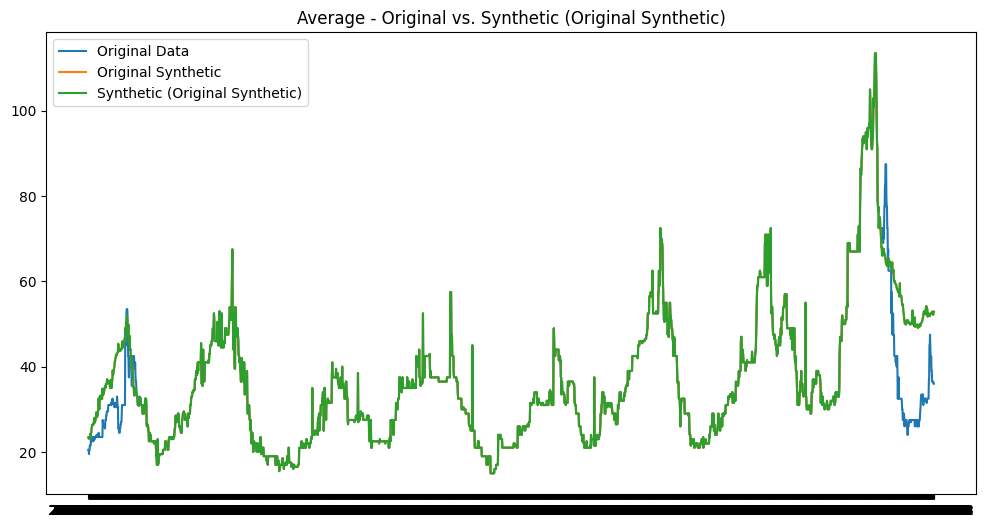

Visualizing dataset: Amplified Trend


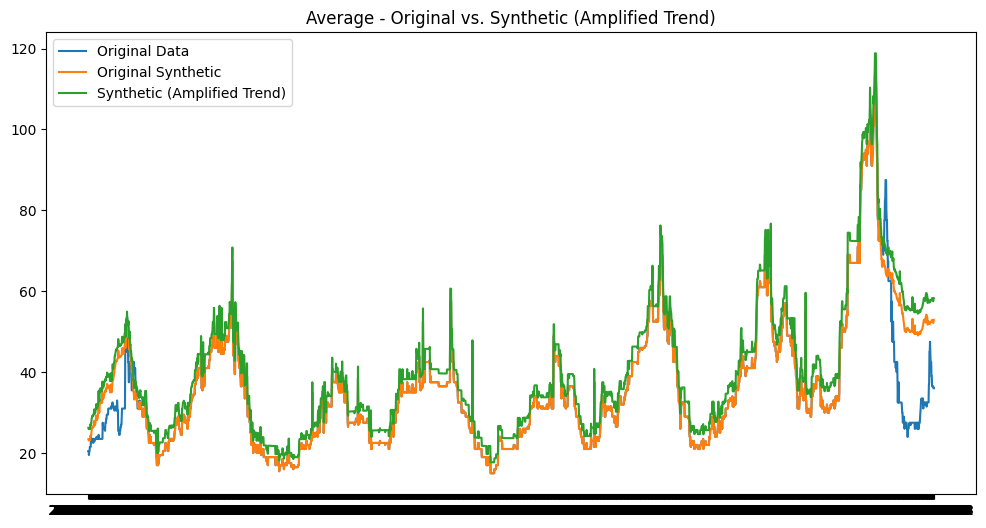

Visualizing dataset: Increased Noise


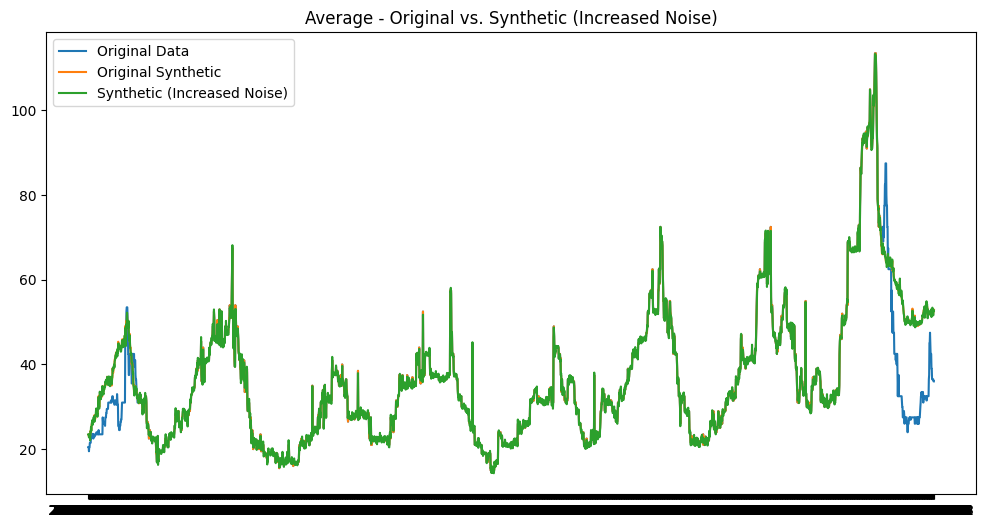

Visualizing dataset: Reduced Seasonality


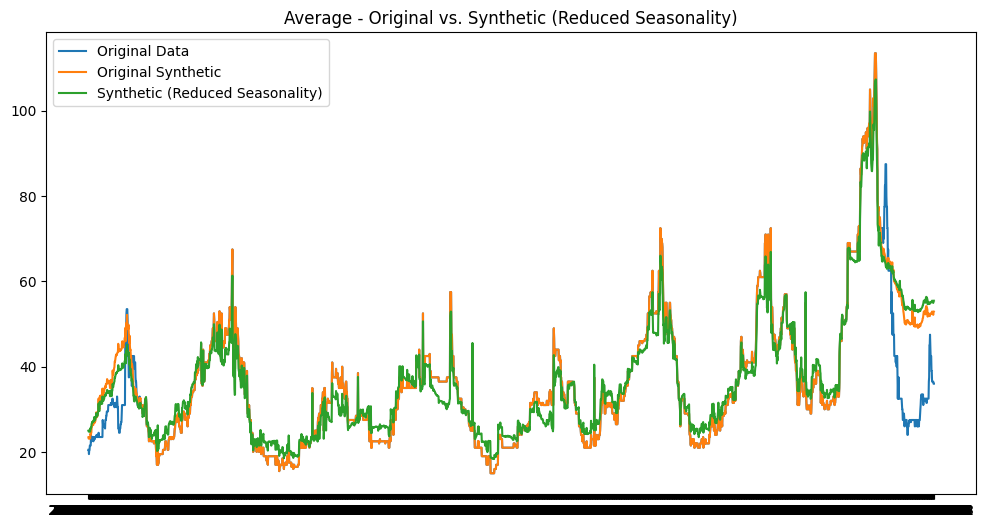

Visualizing dataset: Nonlinear Trend


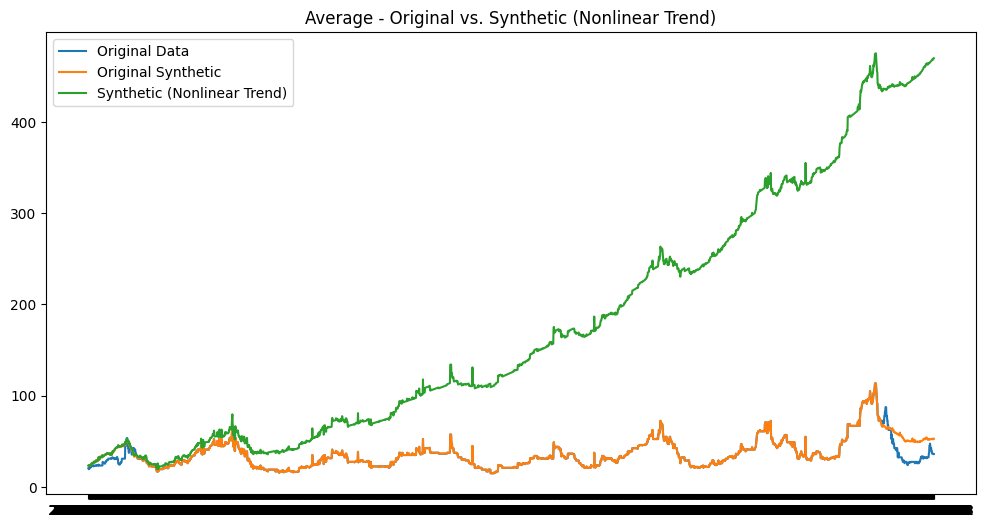

Visualizing dataset: Added Anomalies


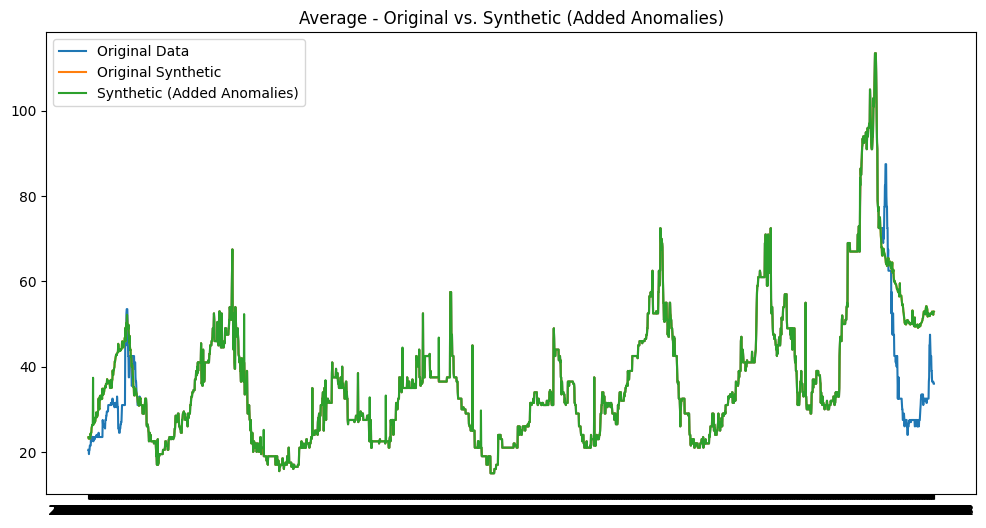

Visualizing dataset: Structural Break


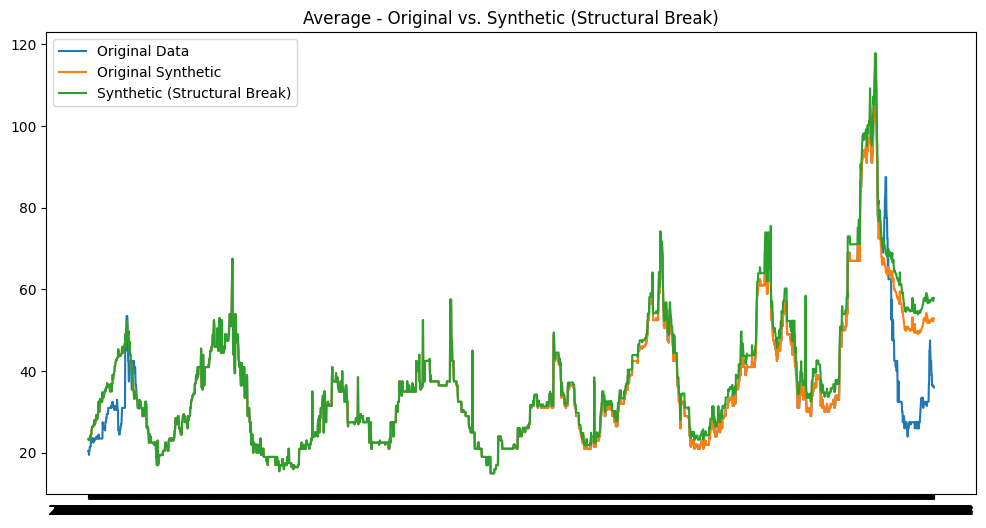

Visualizing dataset: Shortened Seasonality


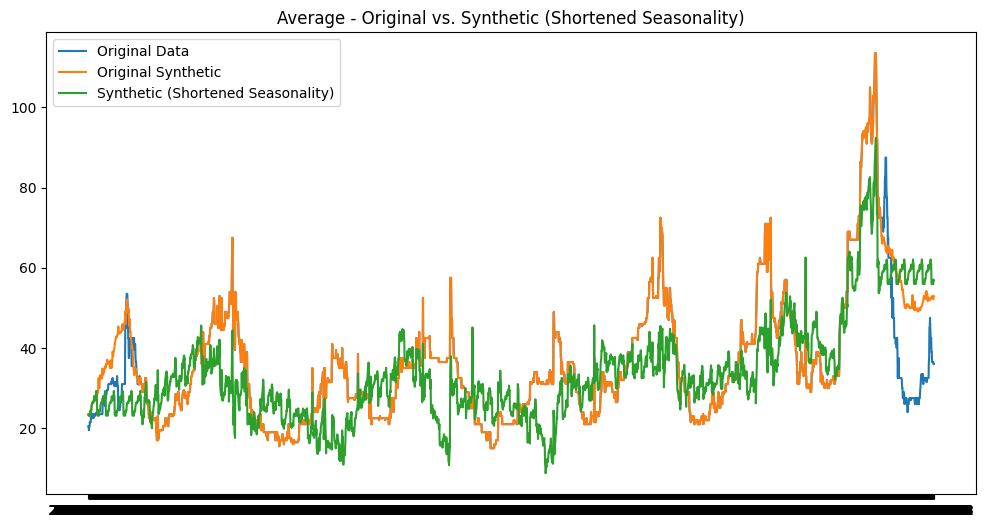

Visualizing dataset: Non-Stationary Variance


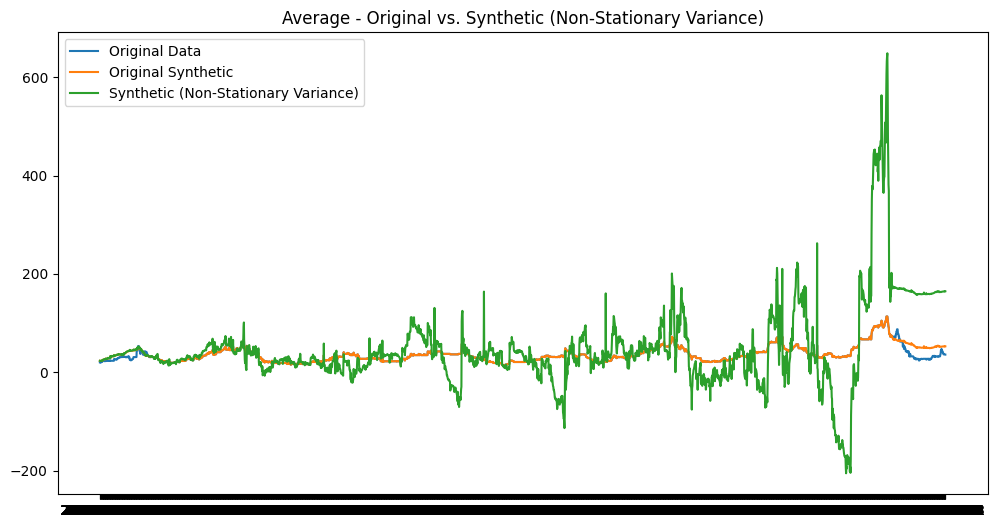

Visualizing dataset: Regime Switching


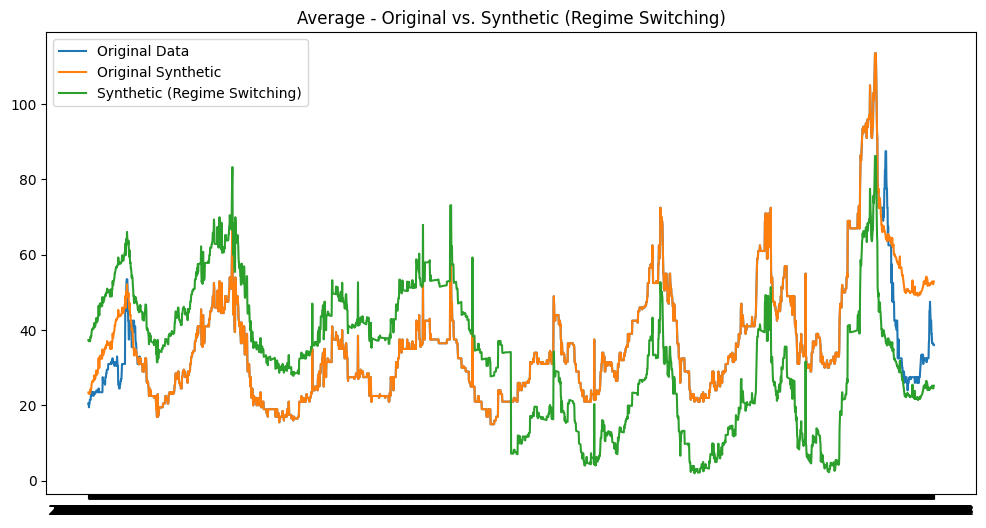

In [12]:
# Visualize variations
for name, dataset in synthetic_datasets.items():
    print(f"Visualizing dataset: {name}")
    for column in dataset.columns:
        if column == 'Average':
            plt.figure(figsize=(12, 6))
            plt.plot(data[column], label='Original Data')
            plt.plot(synthetic_datasets['Original Synthetic'][column], label=f'Original Synthetic')
            plt.plot(dataset[column], label=f'Synthetic ({name})')
            plt.title(f"{column} - Original vs. Synthetic ({name})")
            plt.legend()
            plt.show()